In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.layers.core import Dense, Dropout, Activation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("[Info] train data={:7,}".format(len(train_images)))  
print("[Info] test  data={:7,}".format(len(test_images)))  

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[Info] train data= 60,000
[Info] test  data= 10,000


In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def show_train_history(train_history, train, validation, layer):  
    plt.plot(train_history.history[train], linewidth=3)  
    plt.plot(train_history.history[validation], linewidth=3)  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid(True)
    if train == 'acc':
        plt.savefig("hidden layers_acc_" + str(layer) + ".jpg")
    if train == 'loss':
        plt.savefig("hidden layers_loss_" + str(layer) + ".jpg")
    plt.show()  

In [5]:
#1 Hidden Layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_1 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 133us/step - loss: 1.2045 - acc: 0.7261 - val_loss: 0.6678 - val_acc: 0.8592
Epoch 2/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.5835 - acc: 0.8623 - val_loss: 0.4681 - val_acc: 0.8850
Epoch 3/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.4614 - acc: 0.8814 - val_loss: 0.3976 - val_acc: 0.8976
Epoch 4/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.4065 - acc: 0.8918 - val_loss: 0.3605 - val_acc: 0.9048
Epoch 5/20
48000/48000 [==============================] - 2s 41us/step - loss: 0.3735 - acc: 0.8988 - val_loss: 0.3370 - val_acc: 0.9090
Epoch 6/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.3506 - acc: 0.9041 - val_loss: 0.3199 - val_acc: 0.9112
Epoch 7

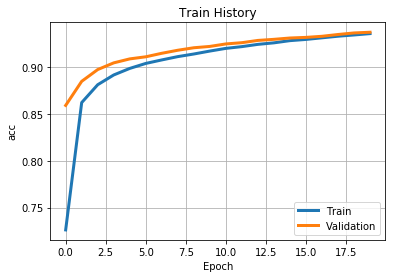

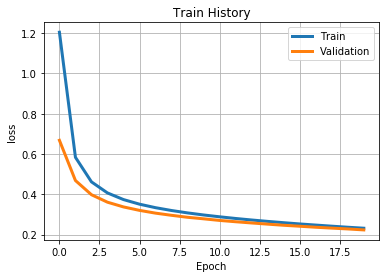

60000/60000 [==============================] - 3s 49us/step

[Info] Accuracy of testing data = 93.7%


In [6]:
layer = 1
show_train_history(train_history_1, 'acc', 'val_acc', layer)
show_train_history(train_history_1, 'loss', 'val_loss', layer)

scores_1 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_1[1]*100.0)) 

In [7]:
#2 Hidden Layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_2 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")  
network.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 56us/step - loss: 1.6794 - acc: 0.4414 - val_loss: 0.8179 - val_acc: 0.8267
Epoch 2/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.9426 - acc: 0.6986 - val_loss: 0.5085 - val_acc: 0.8721
Epoch 3/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.7252 - acc: 0.7706 - val_loss: 0.4111 - val_acc: 0.8911
Epoch 4/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.6203 - acc: 0.8091 - val_loss: 0.3600 - val_acc: 0.8999
Epoch 5/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.5536 - acc: 0.8288 - val_loss: 0.3247 - val_acc: 0.9086
Epoch 6/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.5041 - acc: 0.8483 - val_loss: 0.3004 - val_acc: 0.9140
Epoch 7/20
48

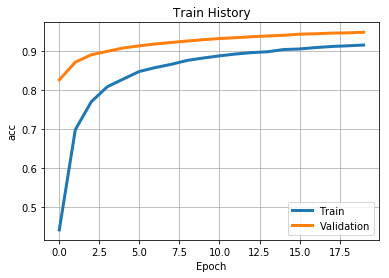

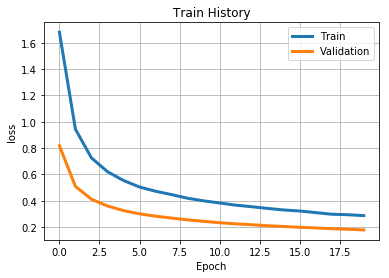

60000/60000 [==============================] - 3s 51us/step

[Info] Accuracy of testing data = 94.7%


In [8]:
layer = 2
show_train_history(train_history_2, 'acc', 'val_acc', layer)
show_train_history(train_history_2, 'loss', 'val_loss', layer)

scores_2 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_2[1]*100.0)) 

In [9]:
#3 Hidden Layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dropout(0.5))
network.add(layers.Dense(256, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(128, activation='relu'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
train_history_3 = network.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
#print(train_history.history)

print("[Info] Model summary:")  
network.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 61us/step - loss: 2.0142 - acc: 0.2865 - val_loss: 1.2907 - val_acc: 0.7552
Epoch 2/20
48000/48000 [==============================] - 2s 52us/step - loss: 1.3230 - acc: 0.5519 - val_loss: 0.6806 - val_acc: 0.8445
Epoch 3/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.9616 - acc: 0.6805 - val_loss: 0.4900 - val_acc: 0.8739
Epoch 4/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.7801 - acc: 0.7492 - val_loss: 0.4087 - val_acc: 0.8885
Epoch 5/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.6838 - acc: 0.7840 - val_loss: 0.3569 - val_acc: 0.8999
Epoch 6/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.6078 - acc: 0.8130 - val_loss: 0.3247 - val_acc: 0.9087
Epoch 7/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.5571 - acc: 0.8291 - val_loss: 0.3002 - val_acc

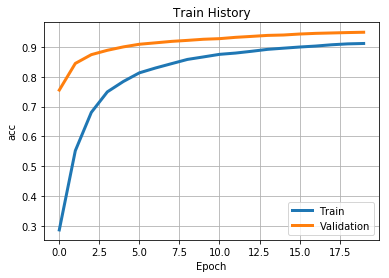

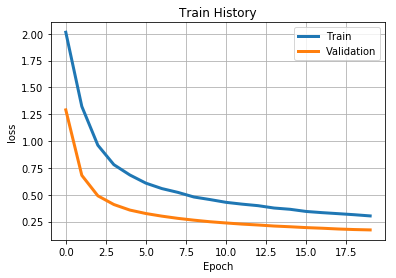

60000/60000 [==============================] - 3s 49us/step

[Info] Accuracy of testing data = 94.9%


In [10]:
layer = 3
show_train_history(train_history_3, 'acc', 'val_acc', layer)
show_train_history(train_history_3, 'loss', 'val_loss', layer)

scores_3 = network.evaluate(train_images, train_labels)
print()
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores_3[1]*100.0)) 

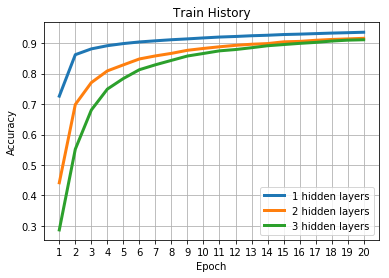

In [11]:
plt.plot(train_history_1.history['acc'], linewidth=3)
plt.plot(train_history_2.history['acc'], linewidth=3)
plt.plot(train_history_3.history['acc'], linewidth=3)
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
plt.legend(['1 hidden layers','2 hidden layers','3 hidden layers'], loc='best')
plt.grid(True)
plt.savefig('hidden_layers_acc_all.jpg',dpi=300)

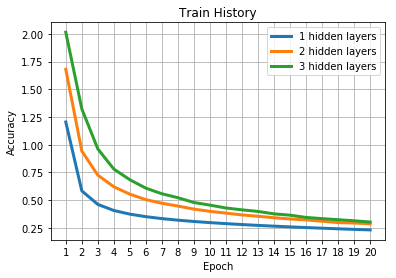

In [12]:
plt.plot(train_history_1.history['loss'], linewidth=3)
plt.plot(train_history_2.history['loss'], linewidth=3)
plt.plot(train_history_3.history['loss'], linewidth=3)
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
plt.legend(['1 hidden layers','2 hidden layers','3 hidden layers'], loc='best')
plt.grid(True)
plt.savefig('hidden_layers_loss_all.jpg',dpi=300)

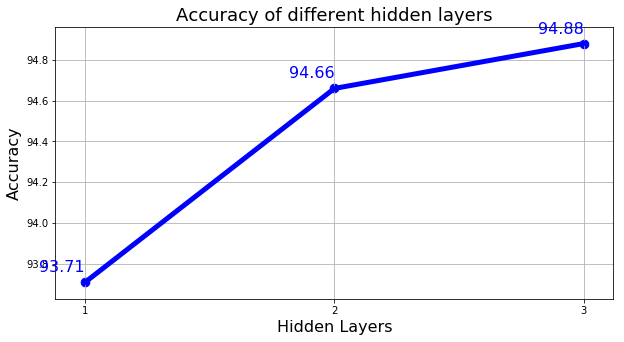

In [13]:
acc = [round(scores_1[1]*100,2),round(scores_2[1]*100,2),round(scores_3[1]*100,2)]
x = ['1','2','3']
plt.figure(figsize=(10,5))
plt.plot(x,acc,'b',lw=5)
plt.scatter(x, acc, s = 75,color='b')
plt.title('Accuracy of different hidden layers', fontsize='18')
plt.xlabel('Hidden Layers',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.grid(True)
for x,y in enumerate(acc):
    plt.text(x,y+0.05,'%s' %y, ha='right', color='b',fontsize=16)
plt.savefig('Accuracy of different hidden layers.jpg',dpi=300)